In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from pathlib import Path
from tensorflow import keras
from tensorflow.keras import applications
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import metrics
from tensorflow.keras import Model
from tensorflow.keras.applications import resnet
import pandas as pd
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from sklearn.utils import shuffle
import gc

In [2]:
pair_image_dataset = pd.read_csv('./new_pair_image_dataset.csv')
pair_image_dataset.head(5)

,base_image,pair_image,label
0,/home/data_ming/imagesiamese/dataset_base/178H...,/home/data_ming/imagesiamese/dataset_pair/178H...,1
1,/home/data_ming/imagesiamese/dataset_base/178H...,/home/data_ming/imagesiamese/dataset_pair/15Su...,0
2,/home/data_ming/imagesiamese/dataset_base/178H...,/home/data_ming/imagesiamese/dataset_pair/16BG...,0
3,/home/data_ming/imagesiamese/dataset_base/178H...,/home/data_ming/imagesiamese/dataset_pair/16Wy...,0
4,/home/data_ming/imagesiamese/dataset_base/178H...,/home/data_ming/imagesiamese/dataset_pair/16TM...,0


In [3]:
type(pair_image_dataset)

pandas.core.frame.DataFrame

In [4]:
dataset = []

In [5]:
for idx,row in pair_image_dataset.iterrows():
    base_image = row['base_image']
    pair_image = row['pair_image']
    label = float(row['label'])
    if os.path.exists(base_image) and os.path.exists(pair_image) :
        dataset.append([base_image,pair_image,label])

In [6]:
len(dataset)

1128

In [7]:
new_image_dataset = pd.read_csv('./add.csv')

In [8]:
for idx,row in new_image_dataset.iterrows():
    base_image = '/home/data_ming/imagesiamese/picture/' + row['base_image']
    pair_image = '/home/data_ming/imagesiamese/picture/' + row['pair_image']
    label = float(row['label'])
    if 'gif'not in base_image  and 'gif' not in pair_image:
        #print(base_image,pair_image,label)
        dataset.append([base_image,pair_image,label])
    else:
        print('0')
        pass

In [9]:
len(dataset)

1232

In [10]:
all_image_dataset = pd.read_csv('./pair_images_all.csv',nrows = 2000)

In [11]:
all_image_dataset.head(5)

,base_image,pair_image,label
0,/home/data_ming/imagesiamese/picture/15QLzHghk...,/home/data_ming/imagesiamese/crop/15vnPTYRVvy_...,0.0
1,/home/data_ming/imagesiamese/picture/15SuI8vnS...,/home/data_ming/imagesiamese/crop/15SuI8vnSNi_...,1.0
2,/home/data_ming/imagesiamese/picture/15PgTTJcA...,/home/data_ming/imagesiamese/crop/15Sf4xEajBK_...,0.0
3,/home/data_ming/imagesiamese/picture/15QKfkVVh...,/home/data_ming/imagesiamese/crop/15SuHNtVMaI_...,0.0
4,/home/data_ming/imagesiamese/picture/15SvdLJ6f...,/home/data_ming/imagesiamese/picture/15PhWxUD8...,0.0


In [12]:
for idx,row in all_image_dataset.iterrows():
    base_image = row['base_image']
    pair_image = row['pair_image']
    label = float(row['label'])
    if 'gif'not in base_image  and 'gif' not in pair_image:
        #print(base_image,pair_image,label)
        dataset.append([base_image,pair_image,label])
    else:
        print('0')
        pass

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [13]:
len(dataset)

3203

In [14]:
resize_image_dataset = pd.read_csv('./images_resize.csv')

In [15]:
for idx,row in resize_image_dataset.iterrows():
    base_image = row['base_image']
    pair_image = row['pair_image']
    label = float(row['label'])
    if 'gif'not in base_image  and 'gif' not in pair_image:
        #print(base_image,pair_image,label)
        dataset.append([base_image,pair_image,label])
    else:
        print('0')
        pass

In [16]:
len(dataset)

3253

In [18]:
image_dataframe = pd.DataFrame(dataset,columns=["base_image","pair_image","label"])
image_dataframe = shuffle(image_dataframe)

In [19]:
image_dataframe.to_csv('./images_350.csv',index=False)

In [20]:
image_data = pd.read_csv('./images_350.csv')

In [21]:
image_data.shape

(3253, 3)

In [22]:
image_data.head(20)

,base_image,pair_image,label
0,/home/data_ming/imagesiamese/dataset_base/16Mz...,/home/data_ming/imagesiamese/dataset_pair/16JL...,0.0
1,/home/data_ming/imagesiamese/dataset_base/16TM...,/home/data_ming/imagesiamese/dataset_pair/178a...,0.0
2,/home/data_ming/imagesiamese/dataset_base/16JP...,/home/data_ming/imagesiamese/dataset_pair/178a...,0.0
3,/home/data_ming/imagesiamese/dataset_base/168M...,/home/data_ming/imagesiamese/dataset_pair/16K2...,0.0
4,/home/data_ming/imagesiamese/picture/15P7TG7ms...,/home/data_ming/imagesiamese/crop/15R0IK7j0c0_...,0.0
5,/home/data_ming/imagesiamese/picture/15S6zSOHb...,/home/data_ming/imagesiamese/crop/15S6zSOHb4k_...,1.0
6,/home/data_ming/imagesiamese/picture/15S7bAmxL...,/home/data_ming/imagesiamese/crop/15S7bAmxL0I_...,1.0
7,/home/data_ming/imagesiamese/picture/16K4qQQG9...,/home/data_ming/imagesiamese/crop/16K4qQQG9kk_...,1.0
8,/home/data_ming/imagesiamese/picture/15Sv0Oen0...,/home/data_ming/imagesiamese/picture/15SvdPllp...,0.0
9,/home/data_ming/imagesiamese/dataset_base/16JV...,/home/data_ming/imagesiamese/dataset_pair/16Wy...,0.0


In [23]:
neg, pos = np.bincount(image_data['label'])
total = neg + pos
print('Examples:    Total: {}     Positive: {} ({:.2f}% of total)\n'.format(total, pos, 100 * pos / total))

Examples:    Total: 3253     Positive: 1277 (39.26% of total)



In [24]:
def preprocess_image(filename):
    image_string = tf.io.read_file(filename)
    image = tf.image.decode_image(image_string, channels=3)
    image = tf.image.resize(image, target_shape)
    image = tf.image.convert_image_dtype(image, tf.float32)
    return image.numpy()

In [25]:
target_shape = (350,350)
x_train_1,x_train_2,labels = [],[],[] 
for idx,row in image_data.iterrows():
    base_image = row['base_image']
    pair_image = row['pair_image']
    label = float(row['label'])
    if 'gif'not in base_image  and 'gif' not in pair_image:
        base_image_resized = preprocess_image(base_image)
        pair_image_resized = preprocess_image(pair_image)
        x_train_1 += [base_image_resized]
        x_train_2 += [pair_image_resized]
        labels += [label]
    else:
        print('0')
        pass

In [26]:
len(labels)

3253

In [27]:
len(x_train_1)

3253

In [28]:
labels_train  = np.array(labels)

In [29]:
labels_train.shape

(3253,)

In [30]:
x_train_1 = np.array(x_train_1)
x_train_2 = np.array(x_train_2)

In [31]:
x_train_1.shape,x_train_2.shape

((3253, 350, 350, 3), (3253, 350, 350, 3))

In [32]:
def euclidean_distance(vects):
    x, y = vects
    sum_square = tf.math.reduce_sum(tf.math.square(x - y), axis=1, keepdims=True)
    return tf.math.sqrt(tf.math.maximum(sum_square, tf.keras.backend.epsilon()))


from tensorflow.keras.applications.resnet50 import ResNet50
base_model = ResNet50(input_shape=(target_shape[0], target_shape[1], 3),include_top=False, pooling="avg",weights="/home/data_ming/imagesiamese/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5",)

trainable = False
for layer in base_model.layers:
    if layer.name == "conv5_block1_out":
        trainable = True
    layer.trainable = trainable
    
flatten = layers.Flatten()(base_model.output)
dense1 = layers.Dense(512, activation="relu")(flatten)
dense1 = layers.BatchNormalization()(dense1)
dense2 = layers.Dense(256, activation="relu")(dense1)
dense2 = layers.BatchNormalization()(dense2)
output = layers.Dense(256)(dense2)

embedding_network = keras.Model(base_model.input, output)
input_1 = layers.Input((target_shape[0], target_shape[1], 3),name='inputimage_1')
input_2 = layers.Input((target_shape[0], target_shape[1], 3),name='inputimage_2')

tower_1 = embedding_network(input_1)
tower_2 = embedding_network(input_2)

merge_layer = layers.Lambda(euclidean_distance)([tower_1, tower_2])
normal_layer = tf.keras.layers.BatchNormalization()(merge_layer)
output_layer = layers.Dense(1, activation="sigmoid")(normal_layer)
siamese = keras.Model(inputs=[input_1,input_2], outputs=output_layer)

In [33]:
def loss(margin=1):
    def contrastive_loss(y_true, y_pred):
        square_pred = tf.math.square(y_pred)
        margin_square = tf.math.square(tf.math.maximum(margin - (y_pred), 0))
        return tf.math.reduce_mean((1 - y_true) * square_pred + (y_true) * margin_square)
    return contrastive_loss

In [34]:
epochs = 10
batch_size = 32
margin = 1  # Margin for constrastive loss.

In [35]:
siamese.compile(loss=loss(margin=margin), optimizer="RMSprop", metrics=["accuracy"])
siamese.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputimage_1 (InputLayer)      [(None, 350, 350, 3  0           []                               
                                )]                                                                
                                                                                                  
 inputimage_2 (InputLayer)      [(None, 350, 350, 3  0           []                               
                                )]                                                                
                                                                                                  
 model (Functional)             (None, 256)          24836992    ['inputimage_1[0][0]',           
                                                                  'inputimage_2[0][0]']     

In [36]:
history = siamese.fit(
    [x_train_1, x_train_2],
    labels_train,
    #validation_data=([x_val_1, x_val_2], labels_val),
    batch_size=batch_size,
    epochs=epochs,
)

Epoch 1/10
102/102 [==============================] - 460s 4s/step - loss: 0.0869 - accuracy: 0.9026
Epoch 2/10
102/102 [==============================] - 459s 4s/step - loss: 0.0560 - accuracy: 0.9551
Epoch 3/10
102/102 [==============================] - 461s 5s/step - loss: 0.0369 - accuracy: 0.9745
Epoch 4/10
102/102 [==============================] - 464s 5s/step - loss: 0.0253 - accuracy: 0.9859
Epoch 5/10
102/102 [==============================] - 451s 4s/step - loss: 0.0177 - accuracy: 0.9895
Epoch 6/10
102/102 [==============================] - 445s 4s/step - loss: 0.0141 - accuracy: 0.9911
Epoch 7/10
102/102 [==============================] - 457s 4s/step - loss: 0.0097 - accuracy: 0.9942
Epoch 8/10
102/102 [==============================] - 456s 4s/step - loss: 0.0075 - accuracy: 0.9963
Epoch 9/10
102/102 [==============================] - 463s 5s/step - loss: 0.0062 - accuracy: 0.9978
Epoch 10/10
102/102 [==============================] - 447s 4s/step - loss: 0.0050 - accura

In [ ]:
#base64

In [98]:
def preprocess_input(base64_input_bytes):
    def decode_bytes(img_bytes):
        img = tf.image.decode_jpeg(img_bytes, channels=3)
        img = tf.image.resize(img,target_shape)
        img = tf.image.convert_image_dtype(img, tf.float32)
        return img
    base64_input_bytes = tf.reshape(base64_input_bytes, (-1,))
    return tf.map_fn(lambda img_bytes: decode_bytes(img_bytes),elems=base64_input_bytes,fn_output_signature=tf.float32)

In [99]:
serving_inputs = tf.keras.layers.Input(shape=(), dtype=tf.string, name='b64_input_bytes')
serving_x = tf.keras.layers.Lambda(preprocess_input, name='decode_image_bytes')(serving_inputs)
serving_x.shape

TensorShape([None, 350, 350, 3])

In [100]:
input_image_1 = tf.expand_dims(serving_x[0],axis =0)
input_image_2 = tf.expand_dims(serving_x[1],axis =0)
serving_output = siamese([input_image_1,input_image_2])
serving_model = tf.keras.Model(serving_inputs, serving_output)
tf.saved_model.save(serving_model, './imagesiamese350base64')

INFO:tensorflow:Assets written to: ./imagesiamese350base64/assets


In [ ]:
# def preprocess_input(base64_input_bytes):
#     def decode_bytes(img_bytes):
#         img = tf.image.decode_jpeg(img_bytes, channels=3)
#         img = tf.image.resize(img,target_shape)
#         img = tf.image.convert_image_dtype(img, tf.float32)
#         return img
#     base64_input_bytes = tf.reshape(base64_input_bytes, (-1,))
#     return tf.map_fn(lambda img_bytes: decode_bytes(img_bytes),elems=base64_input_bytes,fn_output_signature=tf.float32)

In [ ]:
# serving_inputs = tf.keras.layers.Input(shape=(), dtype=tf.string, name='b64_input_bytes')
# serving_x = tf.keras.layers.Lambda(preprocess_input, name='decode_image_bytes')(serving_inputs)
# serving_x.shape

In [ ]:
# input_image_1 = tf.expand_dims(serving_x[0],axis =0)
# input_image_2 = tf.expand_dims(serving_x[1],axis =0)
# serving_output = siamese([input_image_1,input_image_2])
# serving_model = tf.keras.Model(serving_inputs, serving_output)
# tf.saved_model.save(serving_model, './imagesimilaritybase64')

In [92]:
pairs_test=[]
labels_test=[]
target_shape = (350, 350)
test1_1 = '/home/data_ming/imagesiamese/picture/15SxzmGu6Qw.jpg'
test1_2 = '/home/data_ming/imagesiamese/picture/15Sxzl8g6OI.jpg'
# test2_1 = '/home/data_ming/imagesiamese/test/test1/test2.jpg'
# test2_2 = '/home/data_ming/imagesiamese/test/test2/test2.jpg'
# test3_1 = '/home/data_ming/imagesiamese/test/test1/test3.jpg'http://pic5.40017.cn/i/ori/16JMTmySxW0.jpg http://pic5.40017.cn/i/ori/16JMTo5YgU0.jpg
# test3_2 = '/home/data_ming/imagesiamese/test/test2/test3.jpg'
img_test1_1= preprocess_image(test1_1)
img_test1_2= preprocess_image(test1_2)
# img_test2_1= preprocess_image(test2_1)
# img_test2_2= preprocess_image(test2_2)
# img_test3_1= preprocess_image(test3_1)
# img_test3_2= preprocess_image(test3_2)
pairs_test += [[img_test1_1, img_test1_2]]
labels_test += [1]
# pairs_test += [[img_test2_1, img_test2_2]]
# labels_test += [1]
# pairs_test += [[img_test3_1, img_test3_2]]
# labels_test += [0]
pairs_test = np.array(pairs_test)
labels_test=np.array(labels_test).astype("float32")

In [93]:
x_test_1=pairs_test[:,0]
x_test_2=pairs_test[:,1]
x_test_1.shape

(1, 350, 350, 3)

In [94]:
results = siamese.evaluate([x_test_1, x_test_2], labels_test)
print("test loss, test acc:", results)
print(siamese.predict([x_test_1, x_test_2]))

1/1 [==============================] - 0s 168ms/step - loss: 5.6850e-05 - accuracy: 1.0000
test loss, test acc: [5.684961433871649e-05, 1.0]
[[0.99246013]]


In [95]:
def visualize(pairs, labels, to_show=6, num_col=2, predictions=None, test=False):
    num_row = to_show // num_col if to_show // num_col != 0 else 1
    to_show = num_row * num_col
    fig, axes = plt.subplots(num_row, num_col, figsize=(5, 5))
    for i in range(to_show):

        # If the number of rows is 1, the axes array is one-dimensional
        if num_row == 1:
            ax = axes[i % num_col]
        else:
            ax = axes[i // num_col, i % num_col]

        ax.imshow(tf.concat([pairs[i][0], pairs[i][1]], axis=1), cmap="gray")
        ax.set_axis_off()
        if test:
            ax.set_title("True: {} | Pred: {:.5f}".format(labels[i], predictions[i][0]))
        else:
            ax.set_title("Label: {}".format(labels[i]))
    if test:
        plt.tight_layout(rect=(0, 0, 1.9, 1.9), w_pad=0.0)
    else:
        plt.tight_layout(rect=(0, 0, 1.5, 1.5))
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IndexError: index 1 is out of bounds for axis 0 with size 1

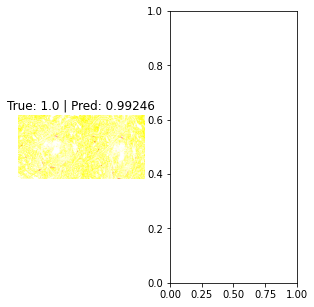

In [96]:
predictions = siamese.predict([x_test_1, x_test_2])
visualize(pairs_test, labels_test, to_show=1, predictions=predictions, test=True)

In [ ]:
15QTwxMo79n.jpg'
image2_URL = 'http://pic5.40017.cn/i/ori/15QTwyNp55K.jpg